In [1]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize,special

import matplotlib.pyplot as plt
import seaborn as sns

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

period of half-life =  183.12
probability of decay in one time step -->  0.0037780525408761534
max of the function p(t,tau) =  1.0
At each step, num of atoms that have decayed
[0, 4, 3, 5, 4, 5, 2, 3, 0, 5, 7, 2, 6, 6, 3, 6, 2, 3, 7, 3, 1, 3, 3, 4, 3, 3, 5, 3, 7, 2, 8, 6, 5, 1, 7, 5, 3, 3, 3, 2, 4, 4, 1, 3, 5, 6, 2, 3, 3, 3, 3, 1, 3, 3, 1, 5, 5, 2, 1, 4, 2, 5, 3, 2, 3, 3, 1, 6, 3, 2, 2, 6, 5, 4, 0, 2, 4, 4, 3, 4, 2, 1, 2, 2, 2, 5, 4, 1, 3, 4, 2, 2, 1, 5, 4, 2, 4, 6, 4, 2, 1, 6, 2, 3, 3, 1, 4, 1, 1, 1, 3, 2, 3, 1, 0, 0, 3, 1, 5, 6, 1, 1, 5, 2, 5, 5, 3, 1, 2, 1, 3, 3, 4, 1, 4, 2, 5, 0, 1, 0, 3, 1, 0, 4, 1, 3, 5, 2, 0, 2, 1, 0, 3, 4, 4, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 7, 0, 1, 0, 2, 3, 0, 0, 2, 2, 1, 3, 2, 4, 1, 5, 5, 0, 0, 2, 1, 4, 1, 0, 0, 2, 2, 3, 3, 3, 0, 2, 3, 1, 3, 0, 4, 2, 2, 1, 1, 0, 5, 3, 4, 1, 0, 1, 2, 4, 2, 2, 1, 0, 1, 2, 3, 0, 0, 2, 0, 4, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 3, 2, 0, 3, 2, 0, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 0, 0, 1, 0, 3, 2, 0, 1, 0, 3, 0, 2, 1, 1, 0, 0

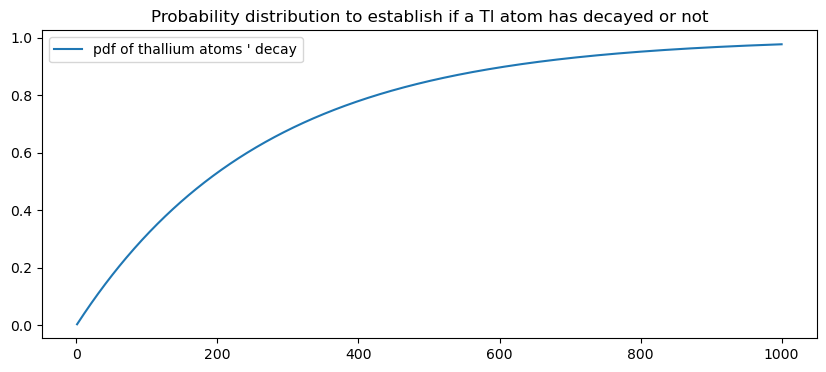

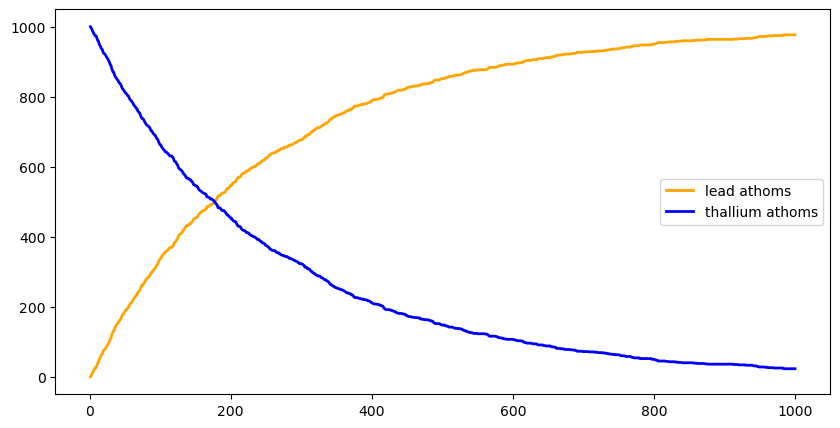

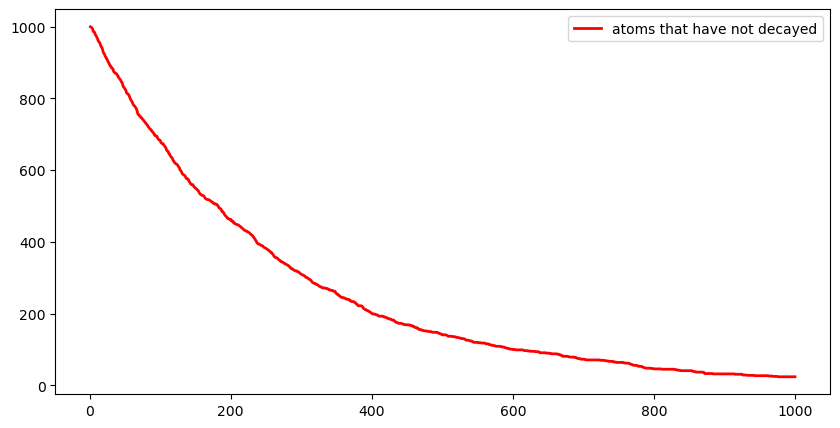

In [2]:
n_thallium = 1000
n_lead = 0
tau = 3.052 * 60 #in seconds
time_step = 1 #sec

#Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not
#, accordingly to the probability  𝑝(𝑡)
def pdf(t, tau):
    return 1 - 2**(-t/tau)
def p_neg(t, tau):
    return (1 - 2**(-t/tau))*(-1)
def cdf(t, tau):
    return (tau*(1-2**(t/tau)) / np.log(2)) + t

print("period of half-life = ", tau)
print("probability of decay in one time step --> ", pdf(1,tau))

time = np.arange(1,1001)
thallium = [1000] #at the beginning, we consider n_thallium = 1000 (for each second). They will decay
lead = [0]
n_atoms_decayed = [0]

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(time, pdf(time, tau), label="pdf of thallium atoms \' decay")
to_find_maximum = optimize.minimize_scalar(p_neg, args=tau)
upper = -to_find_maximum['fun']  
ax.set_title("Probability distribution to establish if a Tl atom has decayed or not")
print("max of the function p(t,tau) = ", upper)
plt.legend()

# generate from sampling distribution
for t in range(1,len(time)): #at t= 0 we already know how many thallium and lead atoms there are
    # for each atom we decide if it has been decayed or not and the probability that this will happen is taken uniformly
    criterion = np.random.uniform(0,upper, thallium[t-1])
    #how many Thallium atoms decay?
    decayed = [prob < pdf(1, tau) for prob in criterion]
    n_atoms_decayed.append(decayed.count(True))
    #Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. 
    lead.append(lead[t-1]+decayed.count(True))
    thallium.append(thallium[t-1]-decayed.count(True))

    
print("At each step, num of atoms that have decayed")
print(n_atoms_decayed)
#Plot the evolution of the two sets as a function of time
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, lead, linewidth=2, label="lead athoms", color = "orange")
ax.plot(time, thallium, linewidth=2, label="thallium athoms", color = "blue")
plt.legend()



#Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform 
#probability distribution  𝑝(𝑡)=2−𝑡/𝜏ln2𝜏 to represent the times of decay of the 1000 Tl atoms.

def pdf_non_uniform(t):    
    return (2**(-t/tau)) * np.log(2) / tau
# NB: the cdf of pdf_non_uniform(t) corresponds to the function pdf(t) !! 
def cdf_non_uniform(t):
    return pdf(t)
def icdf_non_uniform(tt):
    return (-1)*np.log2(1-tt) * tau
    
u = np.random.random(n_thallium) 
# apply the inverse of the CDF
v = icdf_non_uniform(u)
not_decayed = [1000]
for t in range(1,len(time)):
    not_decayed.append([t_decay > t for t_decay in v].count(True))
#Make a plot showing the number of atoms that have not decayed as a function of time
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, not_decayed, linewidth=2, label="atoms that have not decayed", color = "red")
plt.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

[1.34086, 1.34374, 1.3505, 1.35202, 1.344, 1.34688, 1.34848, 1.34628, 1.34836, 1.34406, 1.3527, 1.34938, 1.34982, 1.34682, 1.34684, 1.3467, 1.34326, 1.34514, 1.34154, 1.34866, 1.35026, 1.33906, 1.34548, 1.34566, 1.34338, 1.3471, 1.34914, 1.34476, 1.34812, 1.34756, 1.34522, 1.34722, 1.34192, 1.35244, 1.34956, 1.35404, 1.34602, 1.34332, 1.34664, 1.35272, 1.34318, 1.34144, 1.34554, 1.34072, 1.3437, 1.34984, 1.34824, 1.34688, 1.3453, 1.34336, 1.34058, 1.3467, 1.34426, 1.34744, 1.35086, 1.34922, 1.34894, 1.34932, 1.347, 1.34438, 1.34522, 1.34612, 1.34712, 1.34716, 1.3498, 1.34566, 1.3444, 1.34428, 1.35002, 1.34056, 1.34932, 1.34582, 1.34404, 1.3448, 1.34794, 1.3469, 1.34598, 1.3429, 1.3447, 1.33928, 1.35184, 1.34456, 1.34468, 1.34622, 1.34914, 1.35058, 1.34602, 1.34692, 1.34634, 1.34624, 1.3473, 1.3517, 1.34456, 1.34346, 1.34558, 1.34392, 1.34626, 1.34426, 1.34652, 1.3544]
HIT_MISS METHOD
# of iterations =  100
mean of integrals =  1.3464508000000002
std_dev of integrals =  0.00316093203976

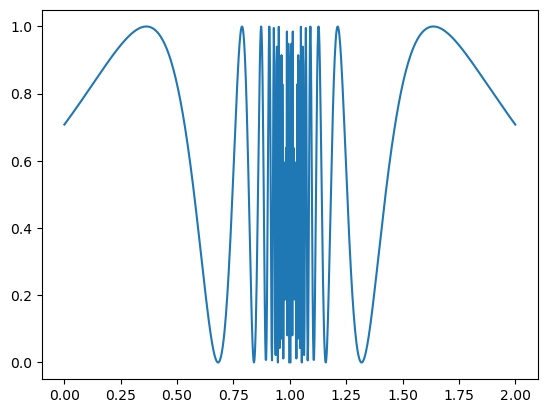

In [3]:
def f(xx):
    return (np.sin(1/(1-xx)))**2

def integral_with_mean_value(x_min, x_max, n):
    xi = np.random.uniform(x_min, x_max, n)
    yi = np.array([f(xii) for xii in xi])
    sum = np.sum(yi)
    integ = (x_max - x_min) / n * sum
    return integ

def calc_sigma(x_min, x_max, n, m):
    # Calculate the integral m times
    integrs = np.array([integral_with_mean_value(x_min, x_max, n) for mi in np.arange(m)])
    # Estimate sigma^2 as <I^2> - <I>^2
    sigma = np.sqrt(np.mean(integrs**2) - np.mean(integrs)**2)
    return sigma


x = np.linspace(0,2,1000)
fig,ax = plt.subplots()
plt.plot(x, f(x))

#compute the integral of  𝑓(𝑥)  between 0 and 2 with the hit/miss method
# Monte Carlo integration
N = 100000
times = 100

#HIT MISS METHOD
I = []
a, b, y_max = 0, 2, 1
for time in range(times):
    c = 0                                    #c = the number of points that fall below the function
    for i in range(N):
        y = y_max * np.random.random()       # y is random uniform between 0 and 1 (sin function)
        x = (b - a) * np.random.random()     # x is random uniform between 0 and 2
        if y < f(x): c += 1
    I.append((c / N * y_max * (b - a)))
print(I)
mean_I = np.mean(I)
std_dev_I = np.std(I) # I don't understand what the rescaled factor should be

print("HIT_MISS METHOD")
print("# of iterations = ", times)
print("mean of integrals = ", mean_I)
print("std_dev of integrals = ", std_dev_I)

#MEAN VALUE METHOD
i_mean_v = integral_with_mean_value(a,b,N)
sigma = calc_sigma(a, b, N, times)

print("MEAN_VALLUE METHOD")
print("# of iterations = ", times)
print("mean of integrals = ", i_mean_v)
print("std_dev of integrals = ", sigma)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
def f(x,y):    
    return x**2 + y**2
def g(p):
    ret = 0
    for i in range(len(p)):
        ret += p[i] ** 2
    return ret

n = 300000
x_min, x_max, y_min, y_max = -1, 1, -1, 1

#points = np.random.uniform(-1, 1, (2,n)) OR:
x_values = np.random.uniform(x_min, x_max, n) # x is in range [-sqrt(1-y^2) ; +sqrt(1-y^2)]
y_values = np.random.uniform(y_min, y_max, n) # y is random uniform between -1 and 1 
c = 0                                         #c = the number of points that fall below the function
for i in range(n):
    if f(x_values[i],y_values[i]) < 1: 
        c += 1
I = (x_max - x_min)*(y_max - y_min)*(c/n)
print("area of unit circle with n = 300000 --> ", I)

#Generalize the result for a 10D sphere.
'''
If n = 1 then Ω is a line, so V (Ω) = b1 − a1. If n = 2 then Ω is a rectangle, and hence
V (Ω) = (b1 −a1)(b2 −a2), the product of the side lengths. The volume of a higher-dimensional
box Ω is also the product of the side lengths.
'''
points = np.random.uniform(-1, 1, (10,n))
c = 0         #c = the number of points that fall below the function   
for i in range(n):
    if g(points[:,i]) < 1: 
        c += 1
        
I = (1 - (-1))**10*(c/n)
print("Volume of 10D sphere with n = 300000 --> ", I)

print("In fact, the general formula  for the volume in D dimension")
print("is = (math.pi)^(D/2) / gamma(D/2 + 1) and gives as result: ",math.pi**5/special.gamma(6))

area of unit circle with n = 300000 -->  3.1419733333333335
Volume of 10D sphere with n = 300000 -->  2.5224533333333334
In fact, the general formula  for the volume in D dimension
is = (math.pi)^(D/2) / gamma(D/2 + 1) and gives as result:  2.550164039877345


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Importance Sampling integral: 0.9582432509655042 , rel. err: 0.14076577495893364

PROBLEM --> the result doesn't correspond to what I expect (0.84)
I think that there's a mistake in w(x) expression. It should be w(x) = 1/(2*sqrt(x))
look at the following result:

Importance Sampling integral: 0.4791216254827521 , rel. err: 0.4296171125205332


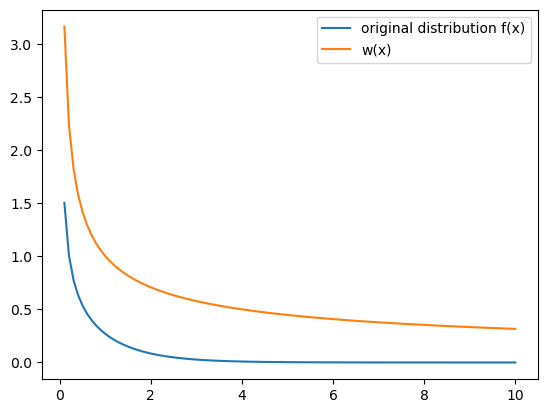

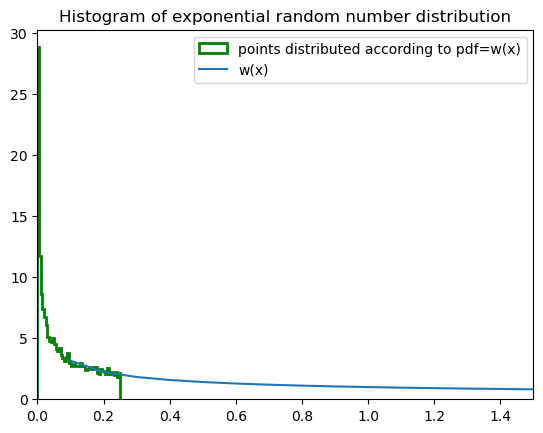

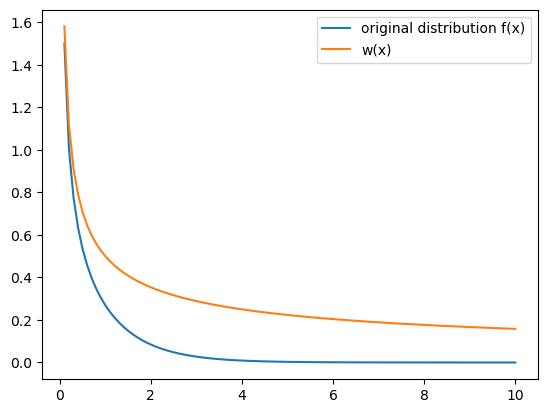

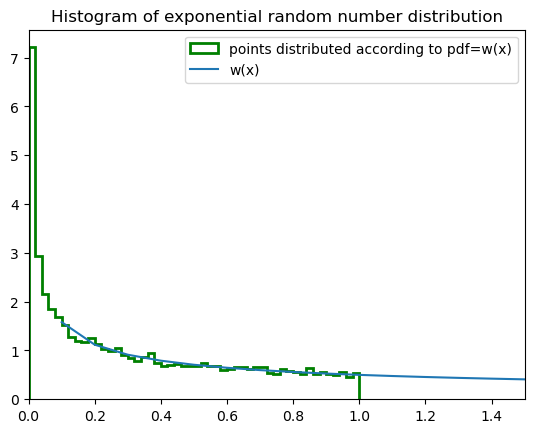

In [4]:
def original_pdf(x):
    """PDF of considered distribution."""
    return x**(-0.5) / (np.exp(x) + 1)
def w_pdf(x):
    """PDF = weight function"""
    return 1/ np.sqrt(x)

def w_cdf(x):
    """CDF of distribution."""
    return 2*math.sqrt(x)

def w_icdf(xx):
    """Inverse CDF of  distribution - i.e. quantile function."""
    return (xx/2)**2

x = np.linspace(0.1, 10, 100)
y_original = []
y_w = []
for xi in x:
    y_original.append(original_pdf(xi))
    y_w.append(w_pdf(xi))
plt.figure()
plt.plot(x, y_original, label='original distribution f(x)')
plt.plot(x, y_w, label='w(x)')
plt.legend()


# generate a distribution of random points according to the weight function
# note that we are generating 10k random numbers instead of 1M
integral_true = 0.84
n = 10000
u = np.random.random(n)    
y = w_icdf(u) # apply the inverse of the CDF


plt.figure()
plt.hist(y, histtype='step', bins=50, density=True, linewidth=2, color='g', label="points distributed according to pdf=w(x)")  # plot histogram of the sample v
plt.plot(x, y_w, label='w(x)')
plt.xlim([0, 1.5])
plt.title("Histogram of exponential random number distribution")
plt.legend()


# calculate the normalization factor given by the integral of the weight function over the integration domain (in this case, it's 1)
w_int = w_cdf(1)-w_cdf(0) #w_cdf(0) = 0
# compute the integral with the importance sampling method
res = original_pdf(y) / w_pdf(y) 
integral = 1.0 / n * np.sum(res) * w_int

# estimate and relative error
print("Importance Sampling integral:", integral, ", rel. err:", np.abs(integral - integral_true)/integral_true)

'''
PROBLEM --> the result doesn't correspond to what I expect (0.84)
I think that there's a mistake in w(x) expression. It should be w(x) = 1/(2*sqrt(x))
Look at following result:
'''

def w2_pdf(x):
    """PDF = weight function"""
    return 1/ (2*np.sqrt(x))

def w2_cdf(x):
    """CDF of distribution."""
    return math.sqrt(x)

def w2_icdf(xx):
    """Inverse CDF of  distribution - i.e. quantile function."""
    return (xx)**2

x = np.linspace(0.1, 10, 100)
y_original = []
y_w = []
for xi in x:
    y_original.append(original_pdf(xi))
    y_w.append(w2_pdf(xi))
plt.figure()
plt.plot(x, y_original, label='original distribution f(x)')
plt.plot(x, y_w, label='w(x)')
plt.legend()


# generate a distribution of random points according to the weight function
# note that we are generating 10k random numbers instead of 1M 
y2 = w2_icdf(u) # apply the inverse of the CDF

plt.figure()
plt.hist(y2, histtype='step', bins=50, density=True, linewidth=2, color='g', label="points distributed according to pdf=w(x)")  # plot histogram of the sample v
plt.plot(x, y_w, label='w(x)')
plt.xlim([0, 1.5])
plt.title("Histogram of exponential random number distribution")
plt.legend()


# calculate the normalization factor given by the integral of the weight function over the integration domain (in this case, it's 1)
w2_int = w2_cdf(1)-w2_cdf(0) #w_cdf(0) = 0
# compute the integral with the importance sampling method
res2 = original_pdf(y2) / w2_pdf(y2) 
integral2 = 1.0 / n * np.sum(res) * w2_int

# estimate and relative error
print("\nPROBLEM --> the result doesn't correspond to what I expect (0.84)")
print("I think that there's a mistake in w(x) expression. It should be w(x) = 1/(2*sqrt(x))")
print("look at the following result:\n")
print("Importance Sampling integral:", integral2, ", rel. err:", np.abs(integral2 - integral_true)/integral_true)
